Original Time Series Data:
         Date  Value
0  2024-01-01    NaN
1  2024-01-02  128.0
2  2024-01-03   76.0
3  2024-01-04  129.0
4  2024-01-05   93.0
5  2024-01-06   60.0
6  2024-01-07   92.0
7  2024-01-08   83.0
8  2024-01-09   78.0
9  2024-01-10   67.0
10 2024-01-11  128.0
11 2024-01-12  275.0
12 2024-01-13   57.0
13 2024-01-14    NaN

Cleaned and Processed Time Series Data:
         Date     Value  Smoothed_Value
0  2024-01-01  0.673611        0.673611
1  2024-01-02  0.986111        0.829861
2  2024-01-03  0.263889        0.641204
3  2024-01-04  1.000000        0.750000
4  2024-01-05  0.500000        0.587963
5  2024-01-06  0.041667        0.513889
6  2024-01-07  0.486111        0.342593
7  2024-01-08  0.361111        0.296296
8  2024-01-09  0.291667        0.379630
9  2024-01-10  0.138889        0.263889
10 2024-01-11  0.986111        0.472222
11 2024-01-12  0.493056        0.539352
12 2024-01-13  0.000000        0.493056
13 2024-01-14  0.673611        0.388889


<ipython-input-1-763291085752>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].mean(), inplace=True)


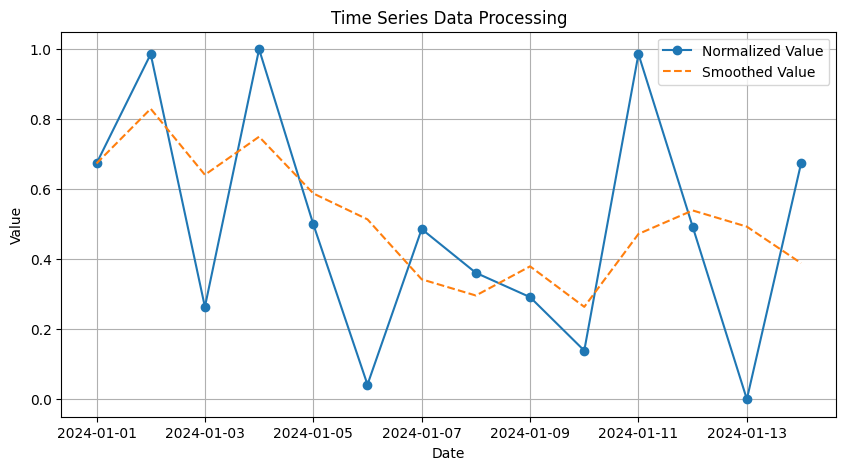

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


n_samples = np.random.randint(10, 21)
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')
data = np.random.randint(50, 150, size=n_samples).astype(float)

indices_with_nan = np.random.choice(n_samples, size=2, replace=False)
data[indices_with_nan] = np.nan

data[np.random.randint(0, n_samples)] *= 5

df = pd.DataFrame({'Date': dates, 'Value': data})
print("Original Time Series Data:")
print(df)

df['Value'].fillna(df['Value'].mean(), inplace=True)

upper_limit = df['Value'].quantile(0.99)
df['Value'] = np.where(df['Value'] > upper_limit, df['Value'].median(), df['Value'])

df['Value'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())

df['Smoothed_Value'] = df['Value'].rolling(window=3, min_periods=1).mean()

print("\nCleaned and Processed Time Series Data:")
print(df)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Value'], label='Normalized Value', marker='o')
plt.plot(df['Date'], df['Smoothed_Value'], label='Smoothed Value', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data Processing')
plt.legend()
plt.grid()
plt.show()